<a href="https://colab.research.google.com/github/alina-bogdanovskaya/NLP_April-May2023/blob/lesson3/AB_NLP_HW_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 12.2 MB/s eta 0:00:00


In [4]:
pip install pymorphy2 stop_words annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from datasets import load_dataset
dataset = load_dataset('IlyaGusev/gazeta', revision="v2.0")


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60964 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6793 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6369 [00:00<?, ? examples/s]

Dataset gazeta downloaded and prepared to /root/.cache/huggingface/datasets/IlyaGusev___gazeta/default/2.0.0/c329f0fc1c22ab6e43e0045ee659d0d43c647492baa2a6ab3a5ea7dac98cd552. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
for split, data in dataset.items():
    data.to_csv(f"my-dataset-{split}.csv", index = None)

Creating CSV from Arrow format:   0%|          | 0/61 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import string
from pymorphy2 import MorphAnalyzer
from stop_words import get_stop_words
import annoy
from gensim.models import Word2Vec, FastText
import pickle
from tqdm import tqdm_notebook
import gensim.downloader as api

from collections import Counter

In [8]:
train_df = pd.read_csv('/content/my-dataset-train.csv')
val_df = pd.read_csv('/content/my-dataset-validation.csv')
test_df = pd.read_csv('/content/my-dataset-test.csv')

In [9]:
train_df

,text,summary,title,date,url
0,Сегодня транспортный налог начисляется в завис...,С 2011 года правительство отменяет самый раздр...,Налог в бак,2010-06-01 10:35:49,https://www.gazeta.ru/auto/2010/05/31_a_337771...
1,Словосочетание «музыкальный кинофестиваль» уже...,"Британские затворники, московские модники, бра...","Секс, наркотики и темный зал",2010-06-01 10:42:59,https://www.gazeta.ru/culture/2010/06/01/a_337...
2,После более чем 12-часовых консультаций Совет ...,Совбез ООН собрался на экстренное совещание дл...,Осудить и отпустить,2010-06-01 11:00:30,https://www.gazeta.ru/politics/2010/06/01_a_33...
3,"Жертвами урагана «Агата», обрушившегося на Цен...",Ураган «Агата» в Центральной Америке унес жизн...,«Агата» открыла страшный сезон,2010-06-01 11:05:30,https://www.gazeta.ru/social/2010/06/01/337799...
4,Решение ограничить рост тарифов естественных м...,Правительство хочет сдержать рост тарифов есте...,Тарифы инфляцию не остановят,2010-06-01 11:48:50,https://www.gazeta.ru/financial/2010/06/01/337...
...,...,...,...,...,...
60959,Сериал «Ведьмак» стал самым запрашиваемым сери...,«Ведьмак» от Netflix возглавил рейтинг самых в...,Малыш Йода не помог: Ведьмак обошел Мандалорца,2019-12-31 18:15:06,https://www.gazeta.ru/culture/2019/12/31/a_128...
60960,Пилот одной из российских авиакомпаний найден ...,Тело российского пилота найдено на одном из пл...,Тело на пляже: как в Майами погиб российский п...,2019-12-31 18:51:06,https://www.gazeta.ru/social/2019/12/31/128937...
60961,В Свердловской области российские военные пред...,В Свердловской области прошли предварительные ...,«Машина будущего»: прошли испытания САУ «Коали...,2019-12-31 19:37:46,https://www.gazeta.ru/army/2019/12/31/12893804...
60962,"В столице Ингушетии, Магасе, трое злоумышленни...","В столице Ингушетии на пост ДПС напали, по пре...",«Великий цинизм»: что известно о перестрелке в...,2019-12-31 21:03:47,https://www.gazeta.ru/social/2019/12/31/128939...


In [22]:
morpher = MorphAnalyzer()
sw = set(get_stop_words("ru"))
exclude = set(string.punctuation)
exclude.update(['«', '»'])

In [23]:
def preprocess_txt(line):
    spls = "".join(i for i in line.strip() if i not in exclude).split()
    spls = [morpher.parse(i.lower())[0].normal_form for i in spls]
    spls = [i for i in spls if i not in sw and i != ""]
    return spls

In [24]:
train_df['summary_clean'] = train_df.summary.apply(preprocess_txt)

In [25]:
val_df['summary_clean'] = val_df.summary.apply(preprocess_txt)

In [26]:
train_df.head(3)

,text,summary,title,date,url,summary_clean
0,Сегодня транспортный налог начисляется в завис...,С 2011 года правительство отменяет самый раздр...,Налог в бак,2010-06-01 10:35:49,https://www.gazeta.ru/auto/2010/05/31_a_337771...,"[2011, правительство, отменять, самый, раздраж..."
1,Словосочетание «музыкальный кинофестиваль» уже...,"Британские затворники, московские модники, бра...","Секс, наркотики и темный зал",2010-06-01 10:42:59,https://www.gazeta.ru/culture/2010/06/01/a_337...,"[британский, затворник, московский, модник, бр..."
2,После более чем 12-часовых консультаций Совет ...,Совбез ООН собрался на экстренное совещание дл...,Осудить и отпустить,2010-06-01 11:00:30,https://www.gazeta.ru/politics/2010/06/01_a_33...,"[совбез, оон, собраться, экстренный, совещание..."


In [28]:
corpus = []
for text in train_df.summary_clean:
  for word in text:
    corpus.append(word)
print(len(corpus))

1820503


In [31]:
freq_dict = Counter(corpus)
freq_dict_sorted = sorted(freq_dict.items(), key=lambda x: -x[1])
len(freq_dict_sorted)

67932

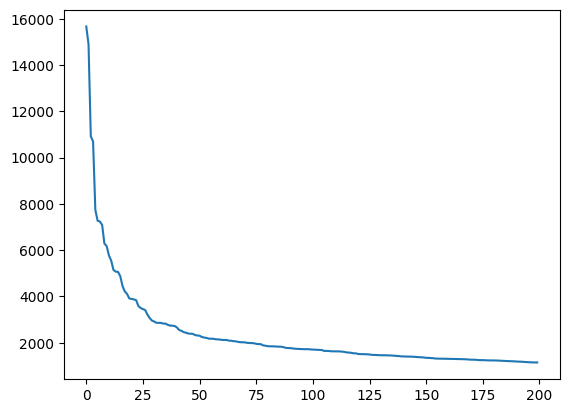

In [33]:
first_200_freqs = [freq for word, freq in freq_dict_sorted[:200]]
plt.plot(first_200_freqs)
plt.show()

In [34]:
high_freq_words = []
mid_freq_words = []
low_freq_words = []

for word, freq in freq_dict_sorted:
  if freq >= 100:
    high_freq_words.append(word)
  elif freq < 100 and freq >= 10:
    mid_freq_words.append(word)
  else: 
    low_freq_words.append(word)

len(high_freq_words), len(mid_freq_words), len(low_freq_words)

(3146, 11446, 53340)

In [146]:
v_size = 128

In [147]:
modelW2V = Word2Vec(sentences=train_df.summary_clean, vector_size=v_size, window=3, min_count=1)
modelFT = FastText(sentences=train_df.summary_clean, vector_size=v_size, min_count=1, window=3, workers=8)

In [148]:
w2v_index = annoy.AnnoyIndex(v_size,'euclidean')
ft_index = annoy.AnnoyIndex(v_size,'euclidean')

index_map = {}
counter = 0

for idx, text_clean in enumerate(train_df.summary_clean):
    n_w2v = 0
    n_ft = 0
    index_map[idx] = train_df.summary[idx]
    vector_w2v = np.zeros(v_size)
    vector_ft = np.zeros(v_size)
    
    for word in text_clean:
        if word in modelW2V.wv:
            vector_w2v += modelW2V.wv[word]
            n_w2v += 1
        if word in modelFT.wv:
            vector_ft += modelFT.wv[word]
            n_ft += 1
    if n_w2v > 0:
        vector_w2v = vector_w2v / n_w2v
    if n_ft > 0:
        vector_ft = vector_ft / n_ft
    w2v_index.add_item(idx, vector_w2v)
    ft_index.add_item(idx, vector_ft)
            
w2v_index.build(25)
ft_index.build(25)

True

In [149]:
def get_response(request, index, model, index_map, article_num):
    question = preprocess_txt(request)
    # print(question)
    vector = np.zeros(v_size)
    norm = 0
    for word in question:
        if word in model.wv:
            vector += model.wv[word]
            norm += 1
    if norm > 0:
        vector = vector / norm
        # print(vector)
    articles = index.get_nns_by_vector(vector, article_num, 500)
    # print(articles)
    return [index_map[i] for i in articles]

In [150]:
TEXT = "совбез оон"

In [151]:
get_response(TEXT, w2v_index, modelW2V, index_map, 10)

['Спецпредставитель Госдепа США по вопросам Украины Курт Волкер встретился с представителями Верховной Рады и обсудил с ними миротворческую миссию ООН в Донбассе. Волкеру также был представлен законопроект о реинтеграции Донбасса.',
 'Сирийские власти объявили о прекращении преследования оппозиции после переговоров с руководством ООН. Договоренность об этом достигнута в телефонном разговоре сирийского президента Башара Асада и генсека ООН Пан Ги Муна. Заявление Асада предшествовало заседанию Совбеза ООН, на котором в четверг будет заслушан доклад о ситуации в Сирии комиссара ООН по правам человека.',
 'В ходе заседания Совета безопасности ООН, посвященного северокорейской проблеме, произошла словесная перепалка между постоянным представителем РФ при ООН Василием Небензей и главой МИД Украины Павлом Климкиным. Российский дипломат, резюмируя произошедшее, заявил о неуважении украинской делегации к Совбезу ООН и другим странам-членам.',
 'После нескольких месяцев блокирования принятия рез

In [152]:
get_response(TEXT, ft_index, modelFT, index_map, 10)

['Спецпредставитель Госдепа США по вопросам Украины Курт Волкер встретился с представителями Верховной Рады и обсудил с ними миротворческую миссию ООН в Донбассе. Волкеру также был представлен законопроект о реинтеграции Донбасса.',
 'Сирийские власти объявили о прекращении преследования оппозиции после переговоров с руководством ООН. Договоренность об этом достигнута в телефонном разговоре сирийского президента Башара Асада и генсека ООН Пан Ги Муна. Заявление Асада предшествовало заседанию Совбеза ООН, на котором в четверг будет заслушан доклад о ситуации в Сирии комиссара ООН по правам человека.',
 'В ходе заседания Совета безопасности ООН, посвященного северокорейской проблеме, произошла словесная перепалка между постоянным представителем РФ при ООН Василием Небензей и главой МИД Украины Павлом Климкиным. Российский дипломат, резюмируя произошедшее, заявил о неуважении украинской делегации к Совбезу ООН и другим странам-членам.',
 'Россия стягивает к российско-украинской границе во

In [153]:
TEXT = "Аршавин повредил ногу и пропустит сезон"

In [154]:
get_response(TEXT, w2v_index, modelW2V, index_map, 7)

['Первый финальный матч Кубка Либертадорес между уругвайским «Пеньяролем» и бразильским «Сантосом» закончился вничью. За 90 минут игрового времени не было забито ни одного гола. За несколько минут до финального свистка форвард «Пеньяроля» Диего Алонсо забил гол, но он был отменен из-за офсайда. Матч запомнился красочным пиротехническим шоу болельщиков.',
 'Результативная игра Андрея Кириленко не спасла «джазменов» от поражения от «Бостона» в домашнем матче регулярного чемпионата, центровой «Денвера» Тимофей Мозгов в очередной раз остался вне заявки своей команды на игру с «Атлантой», защитник «Сан-Антонио» Тони Паркер пропустит от двух до четырех недель из-за травмы левой голени, которую он получил в матче против «Мемфиса».',
 'Центровой «Лейкерс» Эндрю Байнум повторил рекорд плей-офф НБА по количеству блок-шотов за игру и сделал первый трипл-дабл клуба в играх на выбывание с 1991 года. Российский центровой «Денвера» Тимофей Мозгов набрал 6 очков в проигранном стартовом матче серии с «

In [155]:
get_response(TEXT, ft_index, modelFT, index_map, 7)

['Матиас Вейнхандль, подводя итог матчу с «Динамо», отметил, что хоккеисты СКА «перемудрили» и теперь им придется приложить максимум усилий, чтобы прервать неудачно складывающуюся серию. Максим Рыбин признался, что серия с самого начала пошла не так, как питерские армейцы планировали.',
 'Футболисты «Милана» после многолетних неудач смогли победить на выезде «Наполи». С начала второго тайма хозяева играли вдесятером, лишившись перед самым перерывом из-за второй желтой карточки полузащитника Микеле Пациенци.',
 '«Сибирь» не сумела победить «Спартак-Нальчик», не реализовав четвертый пенальти в сезоне. На третью строчку в первенстве ФНЛ поднялся «СКА-Энергия», а «Шинник», выиграв в Нижнекамске, ушел с предпоследнего места, куда опустился «Салют».',
 '«Майами» повел в финальной серии плей-офф с «Оклахомой», выиграв на своей площадке. В третьей четверти южане воспользовались отсутствием на площадке из-за перебора фолов у гостей Кевина Дюранта, а в концовке четвертой гости опять, как и в пре

In [161]:
TEXT = "Московские музеи"

In [160]:
get_response(TEXT, w2v_index, modelW2V, index_map, 5)

['В Московском музее современного искусства открылась выставка Омара Чхаидзе — тбилисского абстракциониста и московского галериста.',
 'Московский музей современного искусства показывает ретроспективную выставку знаменитого испанского живописца Жоан Эрнандеса Пижуана из собрания московского коллекционера Андрея Герцева.',
 'Как художники победили Освенцим в стране, его породившей: в Московском музее современного искусства открылась выставка «Пути немецкого искусства с 1949 года по сегодняшний день».',
 'Парк Горького, «Сокольники», «Ночь в театре» и кино с Кибовским и Михалковым — в «Манеже» три дня будет работать Московский культурный форум.',
 'В музейно-выставочном комплексе «Рабочий и колхозница» открыта выставка «Алло, музей?», представляющая коллекцию московского Музея истории телефона.']

In [162]:
get_response(TEXT, ft_index, modelFT, index_map, 5)

['Парк Горького, «Сокольники», «Ночь в театре» и кино с Кибовским и Михалковым — в «Манеже» три дня будет работать Московский культурный форум.',
 'В Московском музее современного искусства открылась выставка Омара Чхаидзе — тбилисского абстракциониста и московского галериста.',
 'В корпусе Бенуа Государственного русского музея открылась ретроспективная выставка Дмитрия Жилинского, исторической фигуры советского искусства времен застоя.',
 'Московский музей современного искусства показывает ретроспективную выставку знаменитого испанского живописца Жоан Эрнандеса Пижуана из собрания московского коллекционера Андрея Герцева.',
 'Всемирно известный хореограф Начо Дуато с 2011 года переходит на русскую службу: он возглавит балет петербургского Михайловского театра.']